In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X= iris.data[: , [0,3]]
y= iris.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X , y , 
                    test_size = 0.3 , random_state=1 , stratify = y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

NameError: name 'plt' is not defined

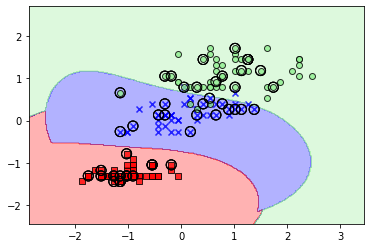

In [7]:
from sklearn.svm import SVC
svm = SVC(kernel ='rbf' , C=1.0 , random_state=0)
svm.fit(X_train_std , y_train)

from funzioni_utili import plot_dec_reg
import numpy as np
X_combined_std = np.vstack((X_train_std , X_test_std))
y_combined = np.hstack((y_train , y_test))
plot_dec_reg(X_combined_std , y_combined , classifier = svm, test_idx=range(105 , 150) )
plt.legend(loc='upper left')
plt.show()

y_pred_svm = svm.predict(X_test_std)
print('Errori_test: %d' % (y_test != y_pred_svm).sum())
from sklearn.metrics import accuracy_score
print('Accuratezza_test %.2f' % accuracy_score(y_test , y_pred_svm))

y_pred_svm_train = svm.predict(X_train_std)
print('Errori_train: %d' % (y_train != y_pred_svm_train).sum())
from sklearn.metrics import accuracy_score
print('Accuratezza_train %.2f' % accuracy_score(y_train , y_pred_svm_train))